#### DATA CLEANING AND PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from google.colab import files

# Import the dataset
all_data = pd.read_csv("electronic_sales.csv")
all_data.head()


,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [ ]:
# Delete column that unrelevant
all_data.drop("Customer ID", axis=1, inplace=True)
all_data.drop("Shipping Type", axis=1, inplace=True)

In [ ]:
# Info Data Type
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                20000 non-null  int64  
 1   Gender             19999 non-null  object 
 2   Loyalty Member     20000 non-null  object 
 3   Product Type       20000 non-null  object 
 4   SKU                20000 non-null  object 
 5   Rating             20000 non-null  int64  
 6   Order Status       20000 non-null  object 
 7   Payment Method     20000 non-null  object 
 8   Total Price        20000 non-null  float64
 9   Unit Price         20000 non-null  float64
 10  Quantity           20000 non-null  int64  
 11  Purchase Date      20000 non-null  object 
 12  Add-ons Purchased  15132 non-null  object 
 13  Add-on Total       20000 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 2.1+ MB


In [ ]:
# Convert date column
all_data["Purchase Date"] = pd.to_datetime(all_data["Purchase Date"])

In [ ]:
# Check Data Type
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                20000 non-null  int64         
 1   Gender             19999 non-null  object        
 2   Loyalty Member     20000 non-null  object        
 3   Product Type       20000 non-null  object        
 4   SKU                20000 non-null  object        
 5   Rating             20000 non-null  int64         
 6   Order Status       20000 non-null  object        
 7   Payment Method     20000 non-null  object        
 8   Total Price        20000 non-null  float64       
 9   Unit Price         20000 non-null  float64       
 10  Quantity           20000 non-null  int64         
 11  Purchase Date      20000 non-null  datetime64[ns]
 12  Add-ons Purchased  15132 non-null  object        
 13  Add-on Total       20000 non-null  float64       
dtypes: dat

In [ ]:
# Check rows of NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Add-ons Purchased,Add-on Total
2,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,NaN,0.0
6,25,Female,No,Smartwatch,SKU1003,3,Completed,Paypal,7603.47,844.83,9,2024-01-30,NaN,0.0
9,24,Male,Yes,Laptop,SKU1005,3,Completed,Cash,4175.64,463.96,9,2024-01-01,NaN,0.0
18,61,Male,Yes,Smartphone,SKU1001,5,Completed,Paypal,103.75,20.75,5,2024-07-07,NaN,0.0
20,45,Male,No,Smartphone,SKU1001,5,Cancelled,Cash,83.00,20.75,4,2024-03-14,NaN,0.0


In [ ]:
# Drop rows of NAN
all_data.dropna(inplace=True)

In [ ]:
# Check rows of NAN after drop
all_data.isnull().sum()

,0
Age,0
Gender,0
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0
Unit Price,0


In [ ]:
# Check for Duplicates
duplicate_count = all_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
# Remove Duplicates
all_data = all_data.drop_duplicates()

duplicate_count = all_data.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count}")

Number of duplicate rows after removal: 0


In [ ]:
# Feature Engineering
all_data['Months'] = all_data['Purchase Date'].dt.month_name()
all_data['Day of Week'] = all_data['Purchase Date'].dt.day_name()
all_data['Week'] = all_data['Purchase Date'].dt.isocalendar().week
all_data['Day'] = all_data['Purchase Date'].dt.day

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15132 entries, 0 to 19998
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Age                15132 non-null  int64         
 1   Gender             15132 non-null  object        
 2   Loyalty Member     15132 non-null  object        
 3   Product Type       15132 non-null  object        
 4   SKU                15132 non-null  object        
 5   Rating             15132 non-null  int64         
 6   Order Status       15132 non-null  object        
 7   Payment Method     15132 non-null  object        
 8   Total Price        15132 non-null  float64       
 9   Unit Price         15132 non-null  float64       
 10  Quantity           15132 non-null  int64         
 11  Purchase Date      15132 non-null  datetime64[ns]
 12  Add-ons Purchased  15132 non-null  object        
 13  Add-on Total       15132 non-null  float64       
 14  Months     

In [ ]:
# Export data to csv
all_data.to_csv('output.csv', index=False)

#### EXPLORATORY DATA ANALYSIS

Sales Analysis

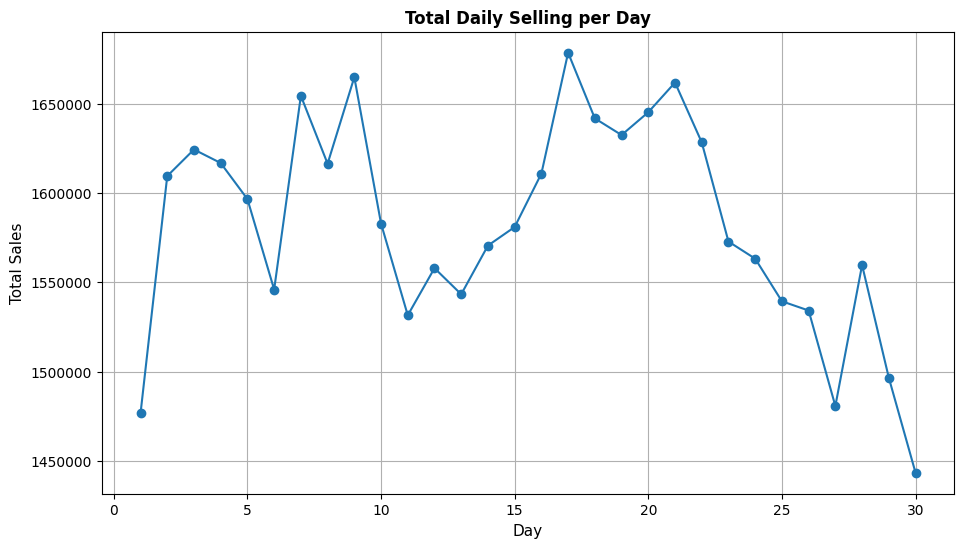

In [ ]:
# Daily selling
daily_sales = all_data.groupby('Day')['Total Price'].sum()

daily_sales = daily_sales[daily_sales.index <= 30]

daily_sales_smooth = daily_sales.rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(11,6))
plt.plot(daily_sales.index, daily_sales_smooth, marker='o', linestyle='-')

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel("Day", fontsize=11)
plt.ylabel("Total Sales", fontsize=11)
plt.title("Total Daily Selling per Day", fontweight='bold')
plt.grid(True)

plt.show()

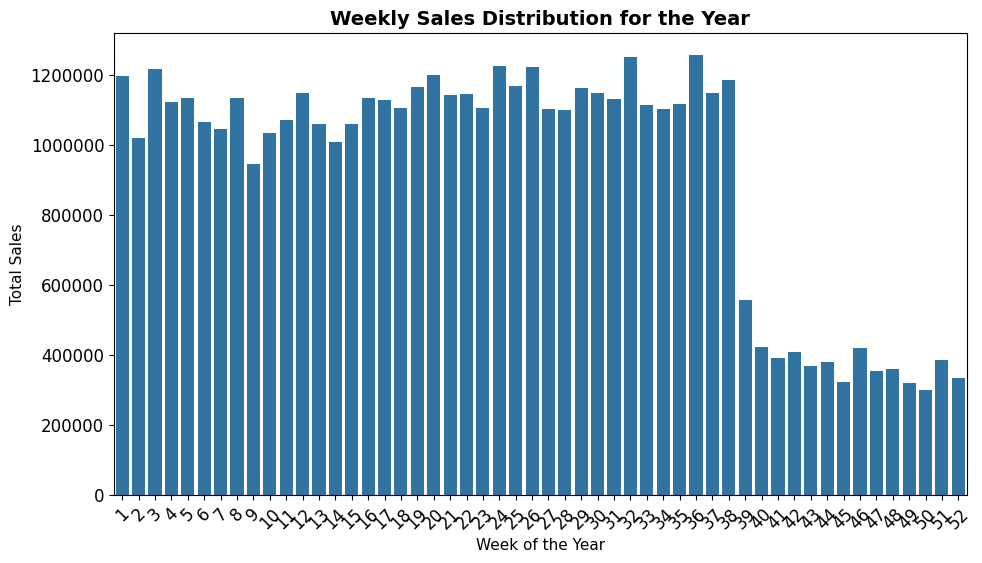

In [ ]:
# Weekly Selling
weekly_sales = all_data.groupby('Week').agg({'Total Price': 'sum'}).reset_index()

# Penjualan per Minggu
plt.figure(figsize=(11,6))

ax = sns.barplot(
    x='Week',
    y='Total Price',
    data=weekly_sales,
    estimator=np.sum
)

plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("Week of the Year", fontsize=11)
plt.ylabel("Total Sales", fontsize=11)
plt.title("Weekly Sales Distribution for the Year", fontweight='bold', fontsize=14)

plt.show()

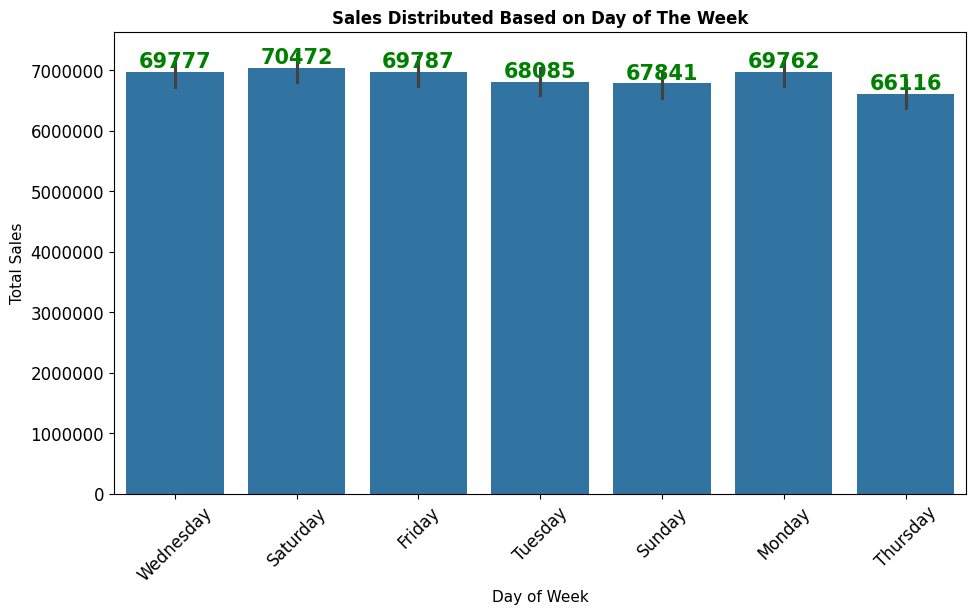

In [ ]:
# Day of Week Selling
plt.figure(figsize=(11,6))

ax = sns.barplot(
    x=all_data['Day of Week'],
    y=all_data['Total Price'],
    estimator=np.sum,
)

plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height() / 100)}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=15, color='green', fontweight='bold'
    )

plt.xlabel("Day of Week", fontsize=11)
plt.ylabel("Total Sales", fontsize=11)
plt.title("Sales Distributed Based on Day of The Week", fontweight='bold')

plt.show()

Product Analysis

In [ ]:
# BEST SELLING PRODUCT

all_data.groupby('Product Type')['Quantity'].sum().sort_values(ascending=False)

,Quantity
Product Type,
Smartphone,24451
Tablet,17059
Smartwatch,16546
Laptop,16272
Headphones,8493


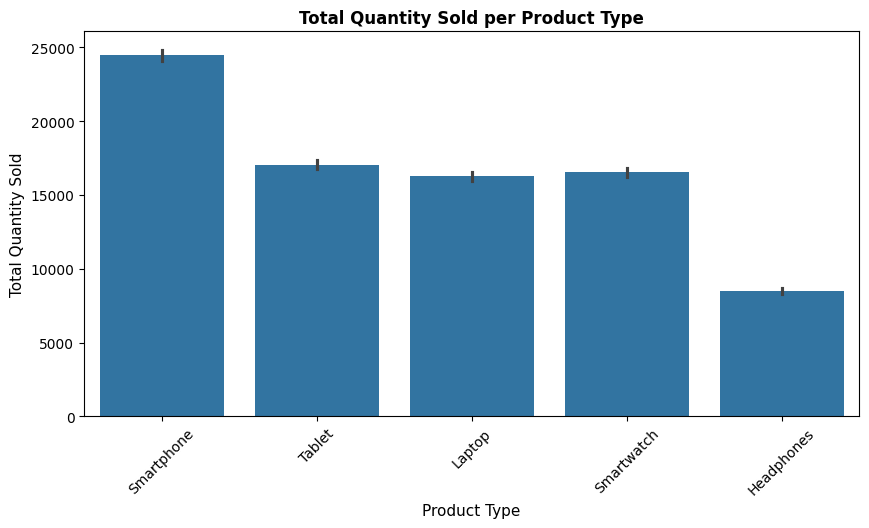

In [ ]:
# Visualization
plt.figure(figsize=(10,5))

ax = sns.barplot(x='Product Type', y='Quantity', data=all_data, estimator=sum)

plt.xticks(rotation=45)
plt.xlabel('Product Type', fontsize=11)
plt.ylabel('Total Quantity Sold', fontsize=11)
plt.title('Total Quantity Sold per Product Type', fontweight='bold')
plt.show()

In [ ]:
# BEST SELLING PRODUCT PER WEEK

weekly_best_selling = all_data.groupby(['Week', 'Product Type'])['Quantity'].sum().reset_index()

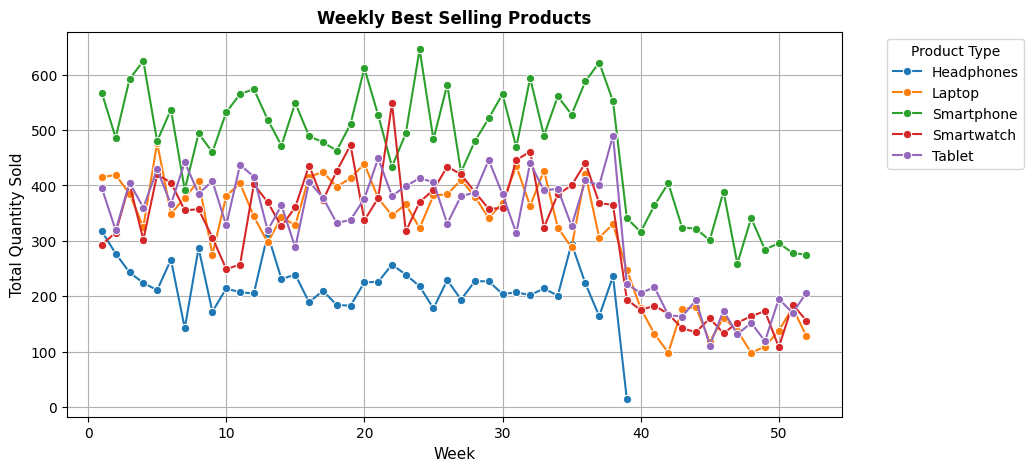

In [ ]:
# Visualization

plt.figure(figsize=(10,5))
ax = sns.lineplot(data=weekly_best_selling, x='Week', y='Quantity', hue='Product Type', marker='o')
plt.xlabel('Week', fontsize=11)
plt.ylabel('Total Quantity Sold', fontsize=11)
plt.title('Weekly Best Selling Products', fontweight='bold')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# REVENUE PRODUCT

all_data.groupby('Product Type')['Total Price'].sum().sort_values(ascending=False)

,Total Price
Product Type,
Smartphone,16163288.35
Smartwatch,10794190.06
Laptop,9283696.65
Tablet,8873249.21
Headphones,3069826.04


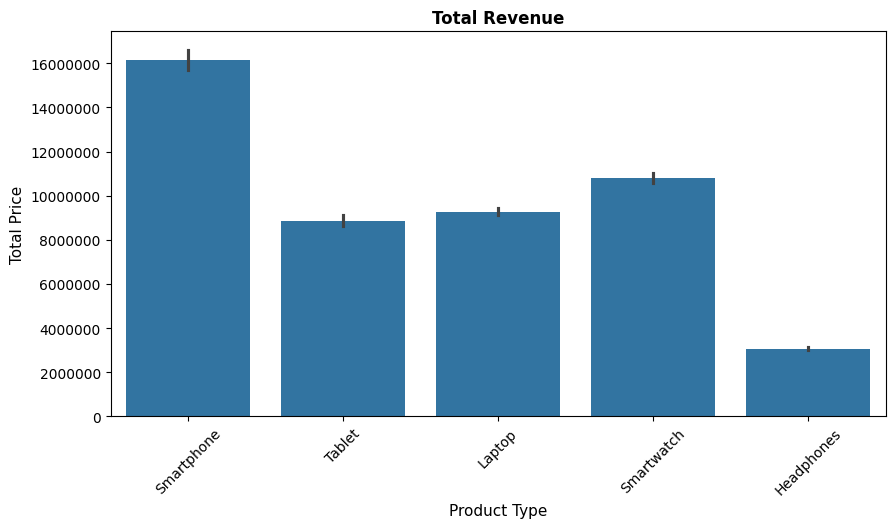

In [ ]:
# Visualization

plt.figure(figsize=(10,5))
sns.barplot(x='Product Type', y='Total Price', data=all_data, estimator=sum)
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Product Type', fontsize=11)
plt.ylabel('Total Price', fontsize=11)
plt.title('Total Revenue', fontweight='bold')
plt.show()

In [ ]:
# REVENUE PRODUCT PER WEEK

weekly_revenue = all_data.groupby(['Week', 'Product Type'])['Total Price'].sum().reset_index()
print(weekly_revenue)

     Week Product Type  Total Price
0       1   Headphones    114494.06
1       1       Laptop    240295.12
2       1   Smartphone    426196.64
3       1   Smartwatch    184341.07
4       1       Tablet    232961.23
..    ...          ...          ...
242    51       Tablet     41995.10
243    52       Laptop     59386.88
244    52   Smartphone     92765.97
245    52   Smartwatch    131793.48
246    52       Tablet     50888.18

[247 rows x 3 columns]


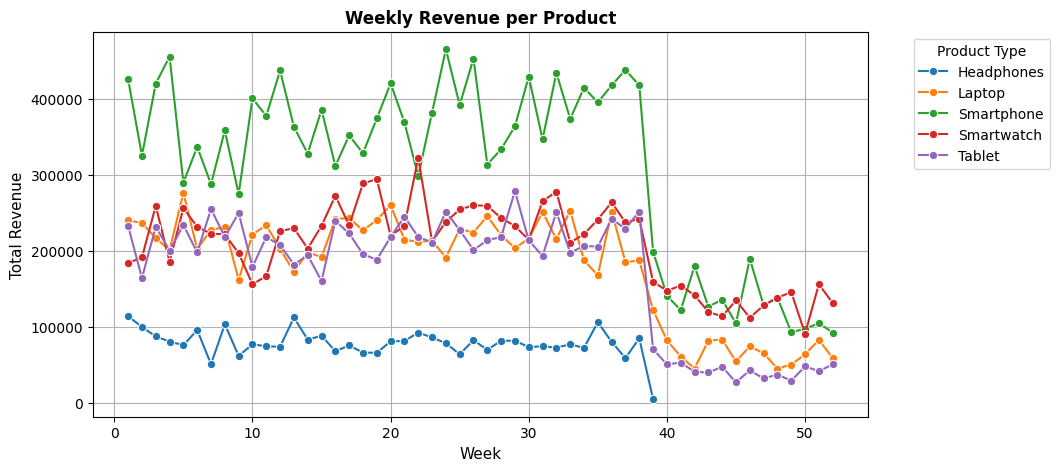

In [ ]:
# Visualization

plt.figure(figsize=(10,5))
ax = sns.lineplot(data=weekly_revenue, x='Week', y='Total Price', hue='Product Type', marker='o')
plt.xlabel('Week', fontsize=11)
plt.ylabel('Total Revenue', fontsize=11)
plt.title('Weekly Revenue per Product', fontweight='bold')
plt.legend(title='Product Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### MODEL PREDICTION

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
le = LabelEncoder()
all_data["Product Type Encoded"] = le.fit_transform(all_data["Product Type"])

daily_sales = all_data.groupby(["Purchase Date", "Product Type Encoded", "Months", "Day of Week", "Week", "Day"]).agg({"Quantity": "sum"}).reset_index()

for lag in range(1, 8):
    daily_sales[f'lag_{lag}'] = daily_sales.groupby("Product Type Encoded")["Quantity"].shift(lag)

daily_sales['moving_avg_7'] = daily_sales.groupby("Product Type Encoded")["Quantity"].transform(lambda x: x.rolling(7).mean())
daily_sales.dropna(inplace=True)

daily_sales = pd.get_dummies(daily_sales, columns=['Months', 'Day of Week'], drop_first=True)

scaler = MinMaxScaler()
quantity_scaler = MinMaxScaler()

features_to_scale = [col for col in daily_sales.columns if col not in ["Purchase Date", "Quantity", "Product Type Encoded"]]
daily_sales[features_to_scale] = scaler.fit_transform(daily_sales[features_to_scale])
daily_sales['Quantity'] = quantity_scaler.fit_transform(daily_sales[['Quantity']])

def create_sequences(data, sequence_length, target_col='Quantity'):
    sequences = []
    targets = []
    product_types = data['Product Type Encoded'].unique()

    for product in product_types:
        product_data = data[data['Product Type Encoded'] == product]
        for i in range(len(product_data) - sequence_length):
            seq = product_data.iloc[i:i+sequence_length][features_to_scale].values
            target = product_data.iloc[i+sequence_length][target_col]
            sequences.append(seq)
            targets.append(target)

    return np.array(sequences), np.array(targets)

SEQUENCE_LENGTH = 7
X, y = create_sequences(daily_sales, SEQUENCE_LENGTH)

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = Sequential([
    LSTM(64, input_shape=(SEQUENCE_LENGTH, X_train.shape[2]), return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

test_predictions = model.predict(X_test)
test_predictions = quantity_scaler.inverse_transform(test_predictions)
y_test_original = quantity_scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_original, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test_original, test_predictions))
r2 = r2_score(y_test_original, test_predictions)

print(f"\nOverall Model Accuracy:")
print(f"- MAE: {mae:.2f}")
print(f"- RMSE: {rmse:.2f}")
print(f"- R² Score: {r2:.2f}")

def forecast_future(model, last_sequence, future_steps, product_type_data):
    forecasts = []
    current_sequence = last_sequence.copy()

    for _ in range(future_steps):
        next_pred = model.predict(current_sequence[np.newaxis, ...])
        forecasts.append(next_pred[0, 0])
        current_sequence = np.roll(current_sequence, -1, axis=0)
        current_sequence[-1] = product_type_data.iloc[-1][features_to_scale].values
        current_sequence[-1, 0] = next_pred

    return forecasts

future_dates = pd.date_range(start=daily_sales["Purchase Date"].max(), periods=8, freq='D')[1:]
future_predictions = []

for product_type in daily_sales["Product Type Encoded"].unique():
    product_data = daily_sales[daily_sales["Product Type Encoded"] == product_type]
    last_seq = product_data.iloc[-SEQUENCE_LENGTH:][features_to_scale].values
    forecasts = forecast_future(model, last_seq, 7, product_data)
    forecasts = quantity_scaler.inverse_transform(np.array(forecasts).reshape(-1, 1))

    for date, forecast in zip(future_dates, forecasts):
        future_predictions.append({
            "Purchase Date": date,
            "Product Type": le.inverse_transform([product_type])[0],
            "Predicted Quantity": forecast[0]
        })

forecast_df = pd.DataFrame(future_predictions)
forecast_df.index = range(1, len(forecast_df) + 1)
forecast_df.set_index("Purchase Date", inplace=True)

print("\nForecast for the next 7 days:")
print(forecast_df)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0515 - val_loss: 0.0135
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0197 - val_loss: 0.0145
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190 - val_loss: 0.0157
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0191 - val_loss: 0.0125
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0191 - val_loss: 0.0140
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0202 - val_loss: 0.0138
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198 - val_loss: 0.0146
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - val_loss: 0.0138
Epoch 9/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0194 - val_loss: 0.0128
Epoch 10/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - val_loss: 0.0137
Epoch 11/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - val_loss: 0.0134
Epoch 12/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step

<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred
<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step

Forecast for the next 7 days:
              Product Type  Predicted Quantity
Purchase Date                                 
2024-09-24          Laptop           41.974796
2024-09-25          Laptop           41.225849
2024-09-26          Laptop           39.901165
2024-09-27          Laptop           40.154751
2024-09-28          Laptop           39.373730
2024-09-29          Laptop           37.852596
2024-09-30          Laptop           38.371574
2024-09-24      Smartphone           66.821686
2024-09-25      Smartphone           63.773483
2024-09-26      Smartphone           61.089710
2024-09-27      Smartphone           60.750080
2024-09-28      Smartphone           60.026718
2024-09-29      Smartphone           58.548008
2024-09-30      Smartphone           58.230751
2024-09-24      Smartwatch           47.867146
2024-09-25      Smartwatch           46.659309
2024-09-26      Smartwatch           45.646858
2024-09-27      Smartwatch           4

<ipython-input-27-3906357155>:85: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1, 0] = next_pred


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
le = LabelEncoder()
all_data["Product Type Encoded"] = le.fit_transform(all_data["Product Type"])

daily_sales = all_data.groupby(["Purchase Date", "Product Type Encoded", "Months", "Day of Week", "Week", "Day"]).agg({"Quantity": "sum"}).reset_index()

for lag in range(1, 8):
    daily_sales[f'lag_{lag}'] = daily_sales.groupby("Product Type Encoded")["Quantity"].shift(lag)

daily_sales['moving_avg_7'] = daily_sales.groupby("Product Type Encoded")["Quantity"].transform(lambda x: x.rolling(7).mean())
daily_sales.dropna(inplace=True)

daily_sales = pd.get_dummies(daily_sales, columns=['Months', 'Day of Week'], drop_first=True)

features = [col for col in daily_sales.columns if col not in ["Purchase Date", "Quantity", "Product Type Encoded"]]
target = "Quantity"

X = daily_sales[features]
y = daily_sales[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

test_predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, test_predictions)
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)

print(f"\nOverall Model Accuracy:")
print(f"- MAE: {mae:.2f}")
print(f"- RMSE: {rmse:.2f}")
print(f"- R² Score: {r2:.2f}")

future_dates = pd.date_range(start=daily_sales["Purchase Date"].max(), periods=8, freq='D')[1:]
future_predictions = []

for product_type in daily_sales["Product Type Encoded"].unique():
    latest_data = daily_sales[daily_sales["Product Type Encoded"] == product_type].iloc[-1:].copy()

    forecast_features = latest_data[features].copy()

    for date in future_dates:
        prediction = model.predict(forecast_features)[0]

        future_predictions.append({
            "Purchase Date": date,
            "Product Type": le.inverse_transform([product_type])[0],
            "Predicted Quantity": prediction
        })

        new_features = forecast_features.copy()
        for lag in range(7, 1, -1):
            new_features[f'lag_{lag}'] = new_features[f'lag_{lag-1}']
        new_features['lag_1'] = prediction
        new_features['moving_avg_7'] = new_features[[f'lag_{i}' for i in range(1, 8)]].mean().values[0]

        forecast_features = new_features

forecast_df = pd.DataFrame(future_predictions)
forecast_df.index = range(1, len(forecast_df) + 1)
forecast_df.set_index("Purchase Date", inplace=True)

print("\nForecast for the next 7 days:")
print(forecast_df)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))



Overall Model Accuracy:
- MAE: 10.93
- RMSE: 14.17
- R² Score: 0.65

Forecast for the next 7 days:
              Product Type  Predicted Quantity
Purchase Date                                 
2024-09-24          Laptop           54.036285
2024-09-25          Laptop           78.200409
2024-09-26          Laptop          124.764938
2024-09-27          Laptop          117.807045
2024-09-28          Laptop           86.838318
2024-09-29          Laptop           91.154480
2024-09-30          Laptop           90.378334
2024-09-24      Smartphone           64.832855
2024-09-25      Smartphone           75.718918
2024-09-26      Smartphone           82.263252
2024-09-27      Smartphone           82.023056
2024-09-28      Smartphone           86.529182
2024-09-29      Smartphone           90.980530
2024-09-30      Smartphone           91.488327
2024-09-24      Smartwatch           43.851822
2024-09-25      Smartwatch           30.508842
2024-09-26      Smartwatch            9.257240
2024-09

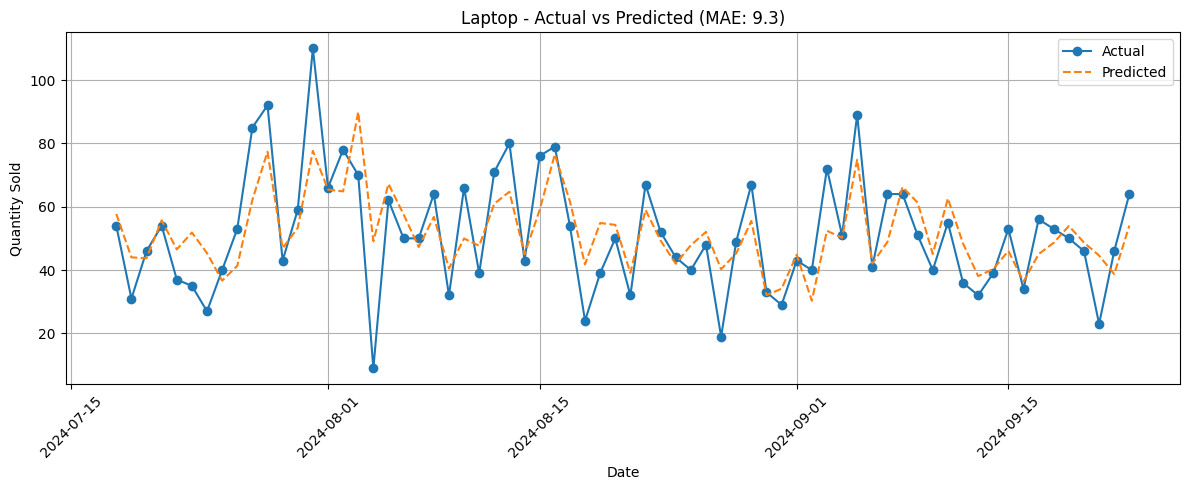

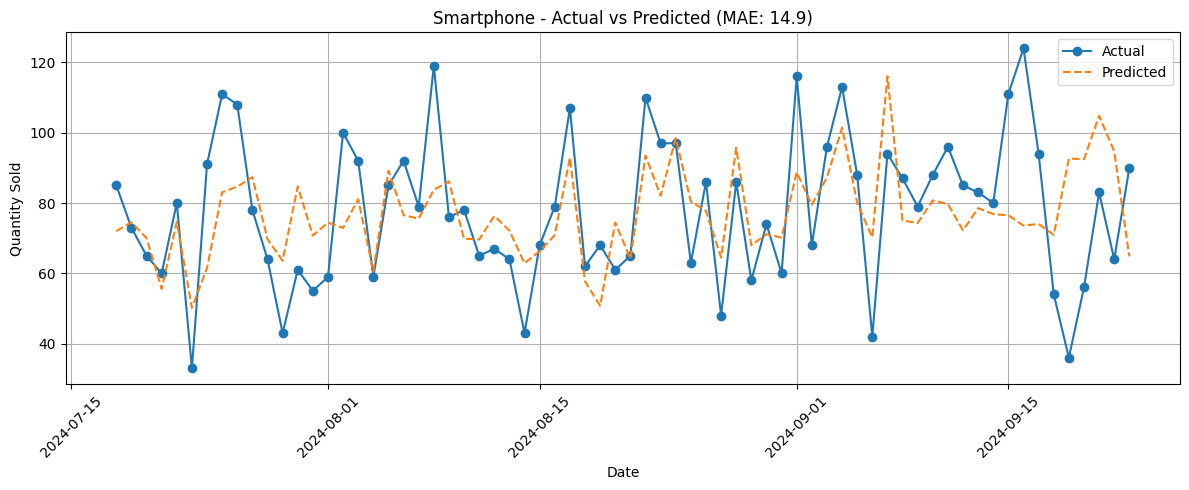

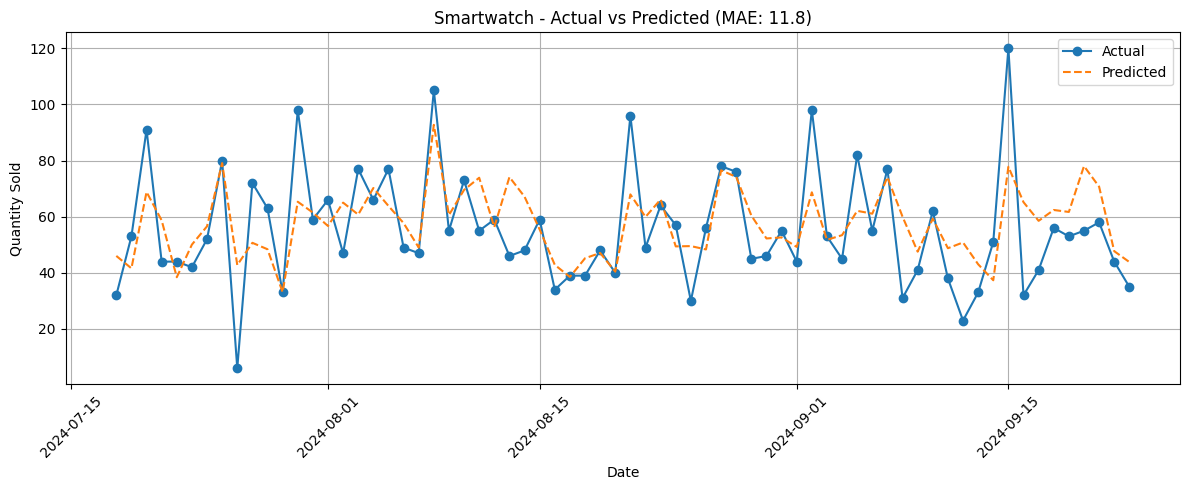

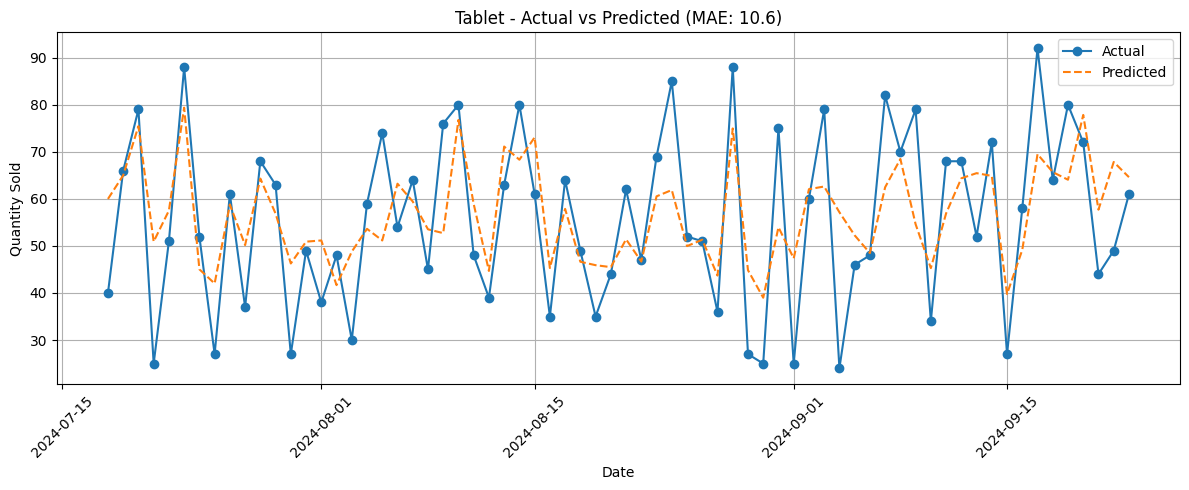

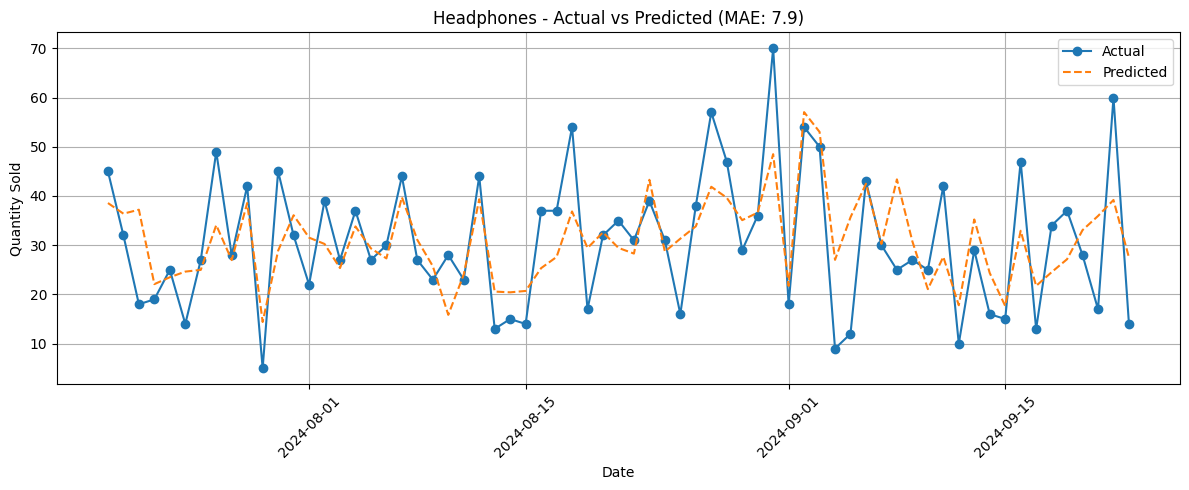

In [ ]:
results = pd.DataFrame({
    'Date': daily_sales.iloc[-len(y_test):]['Purchase Date'],
    'Product Type': le.inverse_transform(daily_sales.iloc[-len(y_test):]['Product Type Encoded']),
    'Actual': y_test.values,
    'Predicted': test_predictions
})

for product in results['Product Type'].unique():
    product_data = results[results['Product Type'] == product]

    plt.figure(figsize=(12, 5))
    plt.plot(product_data['Date'], product_data['Actual'], label='Actual', marker='o')
    plt.plot(product_data['Date'], product_data['Predicted'], label='Predicted', linestyle='--')
    plt.title(f'{product} - Actual vs Predicted (MAE: {mean_absolute_error(product_data["Actual"], product_data["Predicted"]):.1f})')
    plt.xlabel('Date')
    plt.ylabel('Quantity Sold')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

References:

https://www.kaggle.com/code/robikscube/time-series-forecasting-with-machine-learning-yt

https://www.kaggle.com/code/melodytsekeni/big-mart-sales-prediction-xgboost
